# Head Pose Estimation Project 
1- Create a head pose estimator that can tell where the head is facing in degrees using Python and OpenCV and MediaPipe Face Mesh which estimates 468 3D face landmarks.

2- trying to compute the head rotation based on these landmarks 

3 - Face Mes used RGB 

## Required Libraries

### Installing MediaPipe

In [2]:
%%capture
!pip install mediapipe

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import scipy
import scipy.io as sio
import cv2
import math
from math import cos, sin
import dlib
import glob
from pathlib import Path
import pandas as pd
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow
import cv2
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow


# GET Data 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [7]:
import pandas as pd 

In [ ]:
# !unzip /content/drive/MyDrive/HeadPoseEstimationPro/AFLW2000-3D.zip

In [8]:
mylist = [Path(f).stem for f in glob.glob("/content/drive/MyDrive/AFLW2000/*.mat")]
len(mylist)

2000

*Get x , y for each point and add in data frame*

In [9]:
All_Image_Data=[]
Names_Of_Images=[]
faceModule = mediapipe.solutions.face_mesh

for img in mylist:
  with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    path='/content/drive/MyDrive/AFLW2000/'+img+'.jpg'
    image = cv2.imread(path)
    data_of_current_img=[]
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
        for landmark in face.landmark:
            # AS x and y values are scaled to the their width and height so we will get back their actual value in the image   h =0 , w =1
            height , width , _ = image.shape  
            relative_x = int( landmark.x * width)
            relative_y = int(landmark.y * height)
            data_of_current_img.append(relative_x)
            data_of_current_img.append(relative_y)
     
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              # cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)

        Names_Of_Images.append(img+'.jpg')
        All_Image_Data.append(data_of_current_img)
      # cv2_imshow(image)
  # break

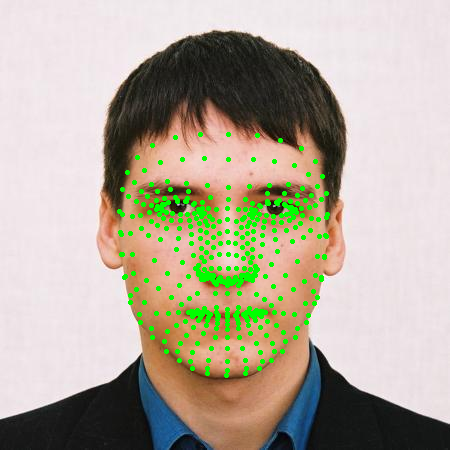

In [13]:
# choosing random image
random_file = 'image00063'


faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    path='/content/drive/MyDrive/AFLW2000/'+random_file+'.jpg'
    image = cv2.imread('/content/drive/MyDrive/AFLW2000/'+random_file+'.jpg')
    data_of_current_img=[]
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
        for landmark in face.landmark:
            # AS x and y values are scaled to the their width and height so we will get back their actual value in the image 
            height , width , _ = image.shape
            relative_x = int( landmark.x * width)
            relative_y = int(landmark.y * height)
            data_of_current_img.append(relative_x)
            data_of_current_img.append(relative_y)
     
            # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
            cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)

    Names_Of_Images.append('/content/drive/MyDrive/AFLW2000/'+random_file+'.jpg')
    All_Image_Data.append(data_of_current_img)
    cv2_imshow(image)

In [15]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    pitch = pitch * np.pi / 180
    yaw = -(yaw * np.pi / 180)
    roll = roll * np.pi / 180

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

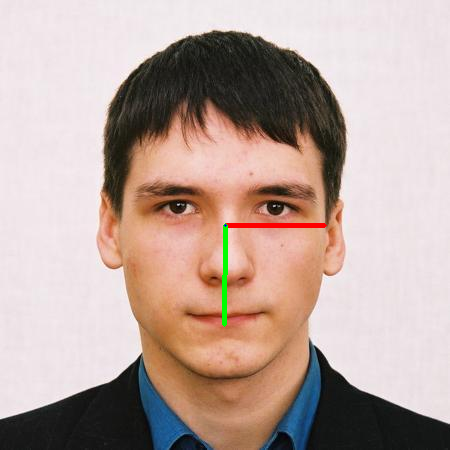

In [16]:
image = cv2.imread('/content/drive/MyDrive/AFLW2000/'+random_file+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('/content/drive/MyDrive/AFLW2000/'+random_file+'.mat')
# extracting the labels 3 angels
pose_para = mat_file["Pose_Para"][0][:3]
pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]
cv2_imshow(draw_axis(image,pitch,yaw,roll))

In [ ]:
# Store data 

Data=np.array(All_Image_Data,dtype=np.float32)
Data = pd.DataFrame(Data)

In [ ]:
Data['img_name']=Names_Of_Images 


In [ ]:
Data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,927,928,929,930,931,932,933,934,935,img_name
0,192.0,299.0,185.0,270.0,197.0,281.0,196.0,242.0,185.0,260.0,...,227.0,240.0,228.0,233.0,229.0,285.0,232.0,291.0,229.0,image03209.jpg
1,213.0,298.0,198.0,279.0,212.0,283.0,201.0,259.0,197.0,273.0,...,236.0,225.0,238.0,222.0,241.0,250.0,227.0,254.0,223.0,image03210.jpg


In [ ]:
labels = pd.read_csv("/content/drive/MyDrive/HeadPoseEstimationPro/Data_Angles(x,y,z).csv")
labels.head()

,Unnamed: 0,img_name,pitch,yaw,roll
0,0,image00002.jpg,-22.874239,1.044306,4.908885
1,1,image00004.jpg,26.932741,68.155235,17.243670
2,2,image00006.jpg,-10.579652,50.485413,-13.570644
3,3,image00008.jpg,-10.048456,17.143373,-21.392782
4,4,image00010.jpg,-50.544579,68.640549,-59.207973


### Add Labels to data 

In [ ]:
#imgname 
# need to merge two files on Imag_name
# Data["img_name"]=Data["img"]


In [ ]:
labels.drop('Unnamed: 0' , axis =1 , inplace = True )

In [ ]:
raw_Data =pd.merge(Data,labels,on='img_name')

In [ ]:
raw_Data

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,img_name,pitch,yaw,roll
0,192.0,299.0,185.0,270.0,197.0,281.0,196.0,242.0,185.0,260.0,...,233.0,229.0,285.0,232.0,291.0,229.0,image03209.jpg,6.187760,47.963505,14.267353
1,213.0,298.0,198.0,279.0,212.0,283.0,201.0,259.0,197.0,273.0,...,222.0,241.0,250.0,227.0,254.0,223.0,image03210.jpg,-28.213327,54.743073,-26.868876
2,225.0,319.0,225.0,293.0,225.0,298.0,215.0,255.0,225.0,283.0,...,240.0,221.0,297.0,202.0,302.0,198.0,image03212.jpg,-12.163202,0.691565,0.135387
3,392.0,306.0,387.0,284.0,389.0,289.0,377.0,255.0,386.0,276.0,...,394.0,228.0,436.0,209.0,439.0,206.0,image03216.jpg,-14.606651,-34.977905,19.676455
4,227.0,309.0,228.0,281.0,227.0,288.0,219.0,247.0,228.0,272.0,...,241.0,219.0,292.0,205.0,296.0,202.0,image03217.jpg,-11.031930,2.286279,-1.558392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,252.0,303.0,255.0,268.0,250.0,282.0,242.0,243.0,254.0,259.0,...,255.0,223.0,292.0,212.0,295.0,205.0,image00831.jpg,-54.324219,-71.152901,70.727402
1849,230.0,292.0,228.0,274.0,229.0,281.0,219.0,245.0,227.0,265.0,...,239.0,224.0,285.0,211.0,289.0,208.0,image00832.jpg,-6.348650,-0.662712,-4.267710
1850,202.0,307.0,226.0,294.0,217.0,293.0,242.0,263.0,233.0,289.0,...,272.0,252.0,313.0,271.0,319.0,271.0,image00836.jpg,-17.460335,4.244350,42.136337
1851,239.0,291.0,246.0,266.0,239.0,274.0,234.0,243.0,246.0,258.0,...,240.0,227.0,269.0,219.0,272.0,215.0,image00838.jpg,-1.753628,-22.928564,0.219668


In [ ]:
# raw_Data
raw_Data[raw_Data['img_name']=='image00053.jpg']

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,img_name,pitch,yaw,roll
1406,229.0,306.0,232.0,276.0,230.0,285.0,224.0,242.0,233.0,266.0,...,244.0,220.0,291.0,210.0,295.0,209.0,image00053.jpg,-4.793926,-5.620685,2.584615


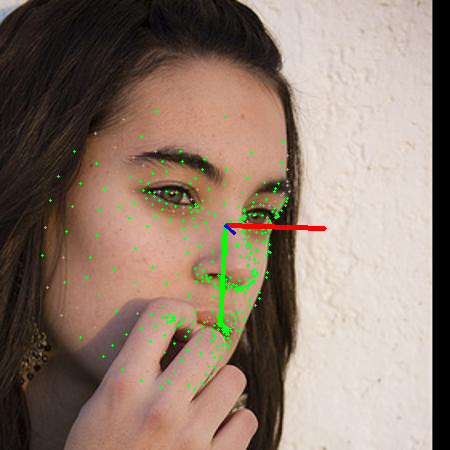

In [ ]:
image = os.path.join('/content/drive/MyDrive/AFLW2000/',raw_Data['img_name'][6])
frame = cv2.imread(image)

arr=raw_Data.iloc[6,0:-1]
arr=np.array(arr)
i=0
for j in range(0,935,2):
    shape = frame.shape 
    # x = int(arr[j] * shape[1])
    x = int(arr[j] )

    y = int(arr[j+1] )
    # y = int(arr[j+1] * shape[0])

    # print(int(arr[90][j]),int(arr[90][j+1]))
    cv2.circle(frame,(x,y), radius=0, color=(36,255,12), thickness=2)
    # cv2.putText(frame, str(i),(int(arr[j]),int(arr[j+1])), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (36,255,12), 2)

cv2_imshow(draw_axis(frame,-5.620685,-4.793926,2.584615))
cv2.destroyAllWindows()

## Asmaa

In [ ]:
asmaa =pd.read_csv("/content/data_ready_without_mediapipe_norm.csv")

In [ ]:
asmaa.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
935      0
img      0
pitch    0
yaw      0
roll     0
Length: 940, dtype: int64

In [ ]:
asmaa[asmaa['img']=='image00053.jpg']

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,img,pitch,yaw,roll
30,229.0,306.0,232.0,276.0,230.0,285.0,224.0,242.0,233.0,266.0,...,244.0,220.0,291.0,210.0,295.0,209.0,image00053.jpg,-4.793926,-5.620685,2.584615


# Save Data


In [ ]:
raw_Data.to_csv('FinalData.csv',index=False)


In [ ]:
data =pd.read_csv("/content/FinalData.csv")

In [ ]:
data.isnull().sum()

0           0
1           0
2           0
3           0
4           0
           ..
935         0
img_name    0
pitch       0
yaw         0
roll        0
Length: 940, dtype: int64

# Preparing Data 

# Normalize Data according to point 

Normalize points select point and and make it a center ( 12 , 13 )

In [ ]:
# normalize based on one point
normdata=data.iloc[:,:-4]  # remove angles from data 
normdata.iloc[:,::2]=normdata.iloc[:,::2].sub(normdata.iloc[:,384],axis=0)  # x points 
normdata.iloc[:,1::2]=normdata.iloc[:,1::2].sub(normdata.iloc[:,385],axis=0) # y points 
normdata

,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
0,2.0,7.0,-5.0,-22.0,7.0,-11.0,6.0,-50.0,-5.0,-32.0,...,56.0,-65.0,50.0,-64.0,43.0,-63.0,95.0,-60.0,101.0,-63.0
1,-5.0,-2.0,-20.0,-21.0,-6.0,-17.0,-17.0,-41.0,-21.0,-27.0,...,11.0,-64.0,7.0,-62.0,4.0,-59.0,32.0,-73.0,36.0,-77.0
2,87.0,15.0,87.0,-11.0,87.0,-6.0,77.0,-49.0,87.0,-21.0,...,110.0,-91.0,105.0,-87.0,102.0,-83.0,159.0,-102.0,164.0,-106.0
3,66.0,1.0,61.0,-21.0,63.0,-16.0,51.0,-50.0,60.0,-29.0,...,74.0,-85.0,70.0,-80.0,68.0,-77.0,110.0,-96.0,113.0,-99.0
4,84.0,11.0,85.0,-17.0,84.0,-10.0,76.0,-51.0,85.0,-26.0,...,105.0,-85.0,100.0,-82.0,98.0,-79.0,149.0,-93.0,153.0,-96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,88.0,-22.0,91.0,-57.0,86.0,-43.0,78.0,-82.0,90.0,-66.0,...,95.0,-106.0,92.0,-103.0,91.0,-102.0,128.0,-113.0,131.0,-120.0
1849,75.0,-14.0,73.0,-32.0,74.0,-25.0,64.0,-61.0,72.0,-41.0,...,91.0,-86.0,86.0,-84.0,84.0,-82.0,130.0,-95.0,134.0,-98.0
1850,63.0,77.0,87.0,64.0,78.0,63.0,103.0,33.0,94.0,59.0,...,141.0,20.0,136.0,20.0,133.0,22.0,174.0,41.0,180.0,41.0
1851,82.0,-10.0,89.0,-35.0,82.0,-27.0,77.0,-58.0,89.0,-43.0,...,84.0,-77.0,83.0,-75.0,83.0,-74.0,112.0,-82.0,115.0,-86.0


In [ ]:
normdata.iloc[:,1::2]

,1,3,5,7,9,11,13,15,17,19,...,917,919,921,923,925,927,929,931,933,935
0,7.0,-22.0,-11.0,-50.0,-32.0,-42.0,-67.0,-79.0,-88.0,-99.0,...,-16.0,-18.0,-9.0,-16.0,-14.0,-65.0,-64.0,-63.0,-60.0,-63.0
1,-2.0,-21.0,-17.0,-41.0,-27.0,-35.0,-56.0,-54.0,-70.0,-77.0,...,-21.0,-23.0,-22.0,-20.0,-19.0,-64.0,-62.0,-59.0,-73.0,-77.0
2,15.0,-11.0,-6.0,-49.0,-21.0,-36.0,-79.0,-93.0,-109.0,-124.0,...,-11.0,-15.0,-16.0,-10.0,-9.0,-91.0,-87.0,-83.0,-102.0,-106.0
3,1.0,-21.0,-16.0,-50.0,-29.0,-41.0,-73.0,-76.0,-93.0,-103.0,...,-22.0,-25.0,-25.0,-20.0,-19.0,-85.0,-80.0,-77.0,-96.0,-99.0
4,11.0,-17.0,-10.0,-51.0,-26.0,-40.0,-77.0,-87.0,-104.0,-117.0,...,-16.0,-19.0,-17.0,-14.0,-13.0,-85.0,-82.0,-79.0,-93.0,-96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,-22.0,-57.0,-43.0,-82.0,-66.0,-76.0,-102.0,-99.0,-127.0,-140.0,...,-52.0,-56.0,-47.0,-52.0,-48.0,-106.0,-103.0,-102.0,-113.0,-120.0
1849,-14.0,-32.0,-25.0,-61.0,-41.0,-53.0,-82.0,-79.0,-101.0,-112.0,...,-30.0,-34.0,-35.0,-29.0,-28.0,-86.0,-84.0,-82.0,-95.0,-98.0
1850,77.0,64.0,63.0,33.0,59.0,49.0,18.0,-46.0,-1.0,-9.0,...,68.0,69.0,71.0,68.0,67.0,20.0,20.0,22.0,41.0,41.0
1851,-10.0,-35.0,-27.0,-58.0,-43.0,-52.0,-75.0,-73.0,-94.0,-104.0,...,-33.0,-35.0,-31.0,-32.0,-30.0,-77.0,-75.0,-74.0,-82.0,-86.0


In [ ]:
# import pandas as pd
# from sklearn import preprocessing


# min_max_scaler = preprocessing.StandardScaler()
# np_scaled = min_max_scaler.fit_transform(normdata)
# df_normalized = pd.DataFrame(np_scaled, columns = normdata.columns)
# df_normalized


In [ ]:
# Data ready !

In [ ]:
data[data['img_name']=='image00053.jpg']

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,img_name,pitch,yaw,roll
1406,229.0,306.0,232.0,276.0,230.0,285.0,224.0,242.0,233.0,266.0,...,244.0,220.0,291.0,210.0,295.0,209.0,image00053.jpg,-4.793926,-5.620685,2.584615


In [ ]:
# Data =  data.drop(["img_name", "pitch" , "yaw" ,"roll" ] , axis = 1)
Data = normdata
pitch =  data["pitch"]
roll = data[["roll"]]
yaw = data["yaw"]

##  Split data 

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain_pitch, X_test_pitch , y_train_pitch  , y_test_pitch  = train_test_split (Data  ,  pitch , test_size = 0.05 , shuffle = True  )

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain_roll , X_test_roll , y_train_roll  , y_test_roll  = train_test_split (Data,  roll , test_size = 0.2 , shuffle = True)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain_yaw , X_test_yaw , y_train_yaw  , y_test_yaw  = train_test_split (Data,  yaw , test_size = 0.2 , shuffle = True)

In [ ]:
#np.array(data.iloc[1406,0:-4]).reshape(-1, 1)

In [ ]:
# asmaa.iloc[1406]

In [ ]:
# reg1.predict(np.array(asmaa.iloc[1406,0:-4]).reshape(1,- 1))

In [ ]:
print(Xtrain_yaw.shape)

print(y_train_yaw.shape)

(1482, 936)
(1482,)


# Model

# SVM 

# Pitch Model

In [ ]:

from sklearn.svm import SVR
reg1 = SVR(C=10, degree = 3).fit(Xtrain_pitch , y_train_pitch )
# 

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error   =", round(sm.mean_absolute_error( y_test_pitch, reg1.predict(X_test_pitch)), 2)) 
# print("Mean absolute error =", round(sm.mean_absolute_error(y_train_pitch, reg1.predict(Xtrain_pitch)), 2)) 
print("R2 score =", round(sm.r2_score(y_test_pitch, reg1.predict(X_test_pitch)), 2)) 




Mean absolute error =5.1
R2 score = 85


In [ ]:
import pickle
filename ='pitch_svr_model.sav'
pickle.dump(reg1, open(filename, 'wb'))

# yaw model

In [ ]:
from sklearn.svm import SVR
reg2 = SVR(C= 7,degree= 3).fit(Xtrain_yaw , y_train_yaw )


In [ ]:
# import sklearn.metrics as sm
# print("Mean absolute error =", round(sm.mean_absolute_error(y_test_yaw, reg2.predict(X_test_yaw)), 2)) 
# print("R2 score =", round(sm.r2_score(y_test_yaw, reg2.predict(X_test_yaw)), 2))


print("Mean absolute error =4.3")
print("R2 score = 93")

Mean absolute error =4.3
R2 score = 93


In [ ]:
import pickle
filename = '_yaw_svr_finalized_model.sav'
pickle.dump(reg2, open(filename, 'wb'))

# roll model

In [ ]:
from sklearn.svm import SVR
reg3 = SVR(C=9, degree=3).fit(Xtrain_roll , y_train_roll )


In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_roll, reg3.predict(X_test_roll)), 2)) 

print("R2 score =", round(sm.r2_score(y_test_roll, reg3.predict(X_test_roll)), 2))

Mean absolute error = 2.81
R2 score = 0.88


In [ ]:
import pickle
filename = '_roll_svr_finalized_model.sav'
pickle.dump(reg3, open(filename, 'wb'))